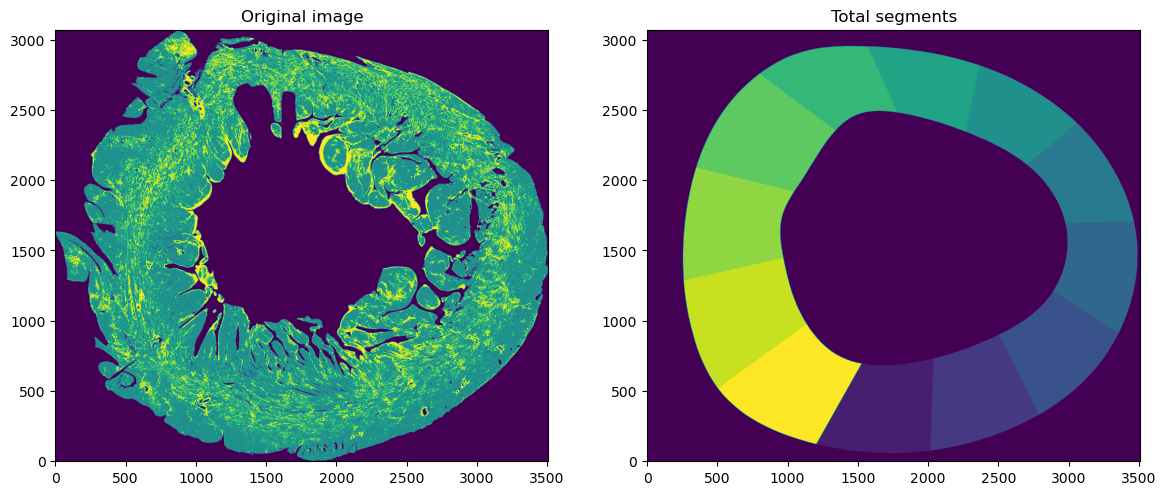

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from fibrosisanalysis.slice import HeartSliceBuilder

n_radial = 1
n_angular = 12
node_step = 10

path = Path('/Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data/')
heart = 'E11971_MYH7'
filename = 'E11971_08_SC2_NABL'

hs_builder = HeartSliceBuilder()
hs_builder.build_from_file(path,
                           heart,
                           filename,
                           n_angular,
                           n_radial,
                           node_step)

hs = hs_builder.heart_slice

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].imshow(hs.image, cmap='viridis', origin='lower')
axs[0].set_title('Original image')
axs[1].imshow(hs.total_segments, cmap='viridis', origin='lower')
axs[1].set_title('Total segments')
plt.show()

In [68]:
import numpy as np
from skimage import transform


def rotate_and_crop(image, angle):
    rotated = transform.rotate(image, angle, resize=True, preserve_range=True)
    rotated = rotated[:, np.any(rotated, axis=0)]
    rotated = rotated[np.any(rotated, axis=1), :]
    rotated = (rotated > 0.5).astype(int) + (rotated > 1.5).astype(int)
    return rotated


def downscale_image(image, factor):
    threshold = 1 - np.count_nonzero(image > 1) / np.count_nonzero(image > 0)
    downscaled = tuple(transform.pyramid_gaussian(image,
                                                  max_layer=factor,
                                                  downscale=2,
                                                  preserve_range=True))[-1]
    
    bins, cumsum = calc_cumsum(downscaled)
    ind = np.argmax(cumsum > threshold)
    downscaled = ((downscaled > 0.5).astype(int) +
                  (downscaled >= bins[ind]).astype(int))
    return downscaled


def calc_cumsum(image):
    vals = image[image >= 1.]
    bins = np.arange(0.5, 2, 0.01)
    hist, _ = np.histogram(vals, bins=bins)
    return bins, np.cumsum(hist) / np.sum(hist)


im = downscale_image(hs.image, 3)
# im = rotate_and_crop(hs.image, 45)

%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].imshow(hs.image, cmap='viridis', origin='lower')
axs[0].set_title('Original image')
axs[1].imshow(im, cmap='viridis', origin='lower')
axs[1].set_title('Rotated image')
plt.show()